In [14]:
#Importing necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.ensemble        import BaggingClassifier
from sklearn.metrics         import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics         import roc_auc_score,roc_curve
from sklearn.model_selection import GridSearchCV

import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data set

lv_credit_card_df = pd.read_csv('/Users/ujjwalrohit/Dataset for machine Learning/UCI_Credit_Card.csv')

In [3]:
#Displaying the characteristics of the credit card data set

print("Dimensions of the data set is :",lv_credit_card_df.shape)
print("Names of the variables in data set :\n",lv_credit_card_df.columns)
print("The information of data set is :",lv_credit_card_df.info())

Dimensions of the data set is : (30000, 25)
Names of the variables in data set :
 Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6 

In [4]:
#Using random seed function for generating the same data set

np.random.seed(3000)

lv_training,lv_test = train_test_split(lv_credit_card_df,test_size = 0.3,random_state = 0)

lv_x_train = lv_credit_card_df.drop(['default.payment.next.month'],axis = 1)
lv_y_train = lv_credit_card_df['default.payment.next.month']

lv_x_test = lv_credit_card_df.drop(['default.payment.next.month'],axis = 1)
lv_y_test = lv_credit_card_df['default.payment.next.month']

In [5]:
#Creating a bagging model

print("-----------------------BAGGING MODEL-------------------")

lv_credit_bag = BaggingClassifier(base_estimator=None ,n_estimators=10,
                                 max_samples=1.0,max_features=1.0,
                                 bootstrap=True)

lv_credit_bag.fit(lv_x_train,lv_y_train)

print("Accuracy of bagging model on training set",lv_credit_bag.score(lv_x_train,lv_y_train))
print("Classification Report:\n",classification_report(lv_y_test,lv_credit_bag.predict(lv_x_test)))


-----------------------BAGGING MODEL-------------------
Accuracy of bagging model on training set 0.9809
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99     23364
           1       1.00      0.92      0.96      6636

    accuracy                           0.98     30000
   macro avg       0.99      0.96      0.97     30000
weighted avg       0.98      0.98      0.98     30000



In [6]:
#Determining accuracy of the created model through confusion matrix

print("Accuracy of bagging model on test data set:",accuracy_score(lv_y_test,
                                                    lv_credit_bag.predict(lv_x_test)))

print("Results of confusion matrix is :\n",confusion_matrix(lv_y_test,
                                        lv_credit_bag.predict(lv_x_test)))


Accuracy of bagging model on test data set: 0.9809
Results of confusion matrix is :
 [[23337    27]
 [  546  6090]]


In [7]:
#Creating a new bagging model with best parameters

print("----------------BAGGING MODEL WITH BEST PARAMETERS----------------")

lv_param_grid = {'n_estimators' : [10,20,30,],
                'max_samples' :[0.5,0.8,1.0],
                'max_features' :[0.5,0.7,1.0]}

lv_credit_bag_grid = BaggingClassifier()
lv_credit_bag_cv = GridSearchCV(estimator=lv_credit_bag_grid,
                                param_grid = lv_param_grid,cv = 5)

lv_credit_bag_result = lv_credit_bag_cv.fit(lv_x_train,lv_y_train)

print("Best Parameters:\n",lv_credit_bag_cv.best_params_)


----------------BAGGING MODEL WITH BEST PARAMETERS----------------
Best Parameters:
 {'max_features': 1.0, 'max_samples': 0.5, 'n_estimators': 30}


In [10]:
#Creating the model with best score

lv_credit_bag_best = BaggingClassifier(n_estimators= lv_credit_bag_result.best_params_['n_estimators'],
                                      max_samples=lv_credit_bag_result.best_params_['max_samples'],
                                      max_features= lv_credit_bag_result.best_params_['max_features'])

In [11]:
#Evaluating the model considering best parameters

lv_credit_bag_best.fit(lv_x_train,lv_y_train)
print("Accuracy on training set with best parameters:",lv_credit_bag_best.score(lv_x_train,lv_y_train))


Accuracy on training set with best parameters: 0.9294


In [12]:
#Predicting the new model

lv_credit_bag_pred_02 = lv_credit_bag_best.predict(lv_x_test)

print("Classification Report:\n",classification_report(lv_y_test,lv_credit_bag_pred_02))

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.96     23364
           1       0.96      0.71      0.82      6636

    accuracy                           0.93     30000
   macro avg       0.94      0.85      0.89     30000
weighted avg       0.93      0.93      0.93     30000



In [13]:
#Determining accuracy of the new model through confusion matrix

print("Accuracy on the test set with best parameter",
     accuracy_score(lv_y_test,lv_credit_bag_best.predict(lv_x_test)))

print("Result of the confusion matrix is :\n",
     confusion_matrix(lv_y_test,lv_credit_bag_best.predict(lv_x_test)))

Accuracy on the test set with best parameter 0.9294
Result of the confusion matrix is :
 [[23189   175]
 [ 1943  4693]]


In [17]:
# Predicting probabilities

lv_bag_probs = lv_credit_bag_best.predict_proba(lv_x_test)

#Considering probabilities for the positive outcome only

lv_bag_probs = lv_bag_probs[:,1]


In [19]:
#Calculate AUC Scores

lv_bag_auc = roc_auc_score(lv_y_test,lv_bag_probs)

#Calculate ROC Curve

lv_bag_fpr,lv_bag_tpr,_ = roc_curve(lv_y_test,lv_bag_probs)

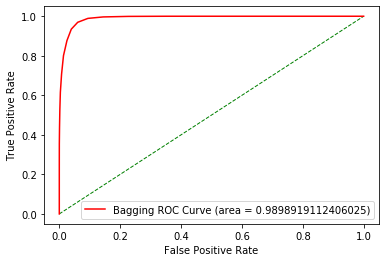

In [22]:
#Plot the straight line for the model

plt.plot([0,1],[0,1],color = 'green', lw = 1,linestyle = '--')

#plot the ROC curve for the model

plt.plot(lv_bag_fpr,lv_bag_tpr,color = "red", label = 'Bagging ROC Curve (area = {0})'.format(lv_bag_auc))

#Defining the axis labels

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

#Show the legend in lower right corner

plt.legend(loc = "lower right")

#Show the plot

plt.show()